In [37]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CovidHandlers import get_df_by_country
%matplotlib inline
# sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10, 8)})

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [40]:
pd.set_option('display.max_rows', 500)

In [41]:
confirmed_df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovery_df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [32]:
# Country list
# confirmed_df['Country/Region'].value_counts().sort_index()

In [74]:
country_name_list = ['Russia', 'Italy', 'Spain', 'Germany', 'France', 'China', 'USA']

In [75]:
country_df_dic = {}
for name in country_name_list:
    country_df_dic[name] = get_df_by_country(name)

In [76]:
# Фильтр по количеству зарегистрированных случаев
min_cases = 50
for key, value in country_df_dic.items():
    df = value[value['Confirmed'] >= min_cases]
    df.reset_index(inplace=True)
    country_df_dic[key] = df

In [79]:
df_list_len = []
current_max_len = 0

for key, value in country_df_dic.items():
    if key != 'China':
        df_list_len.append(len(value))

current_max_len = max(df_list_len)

country_df_dic['China'] = country_df_dic['China'].iloc[:current_max_len]

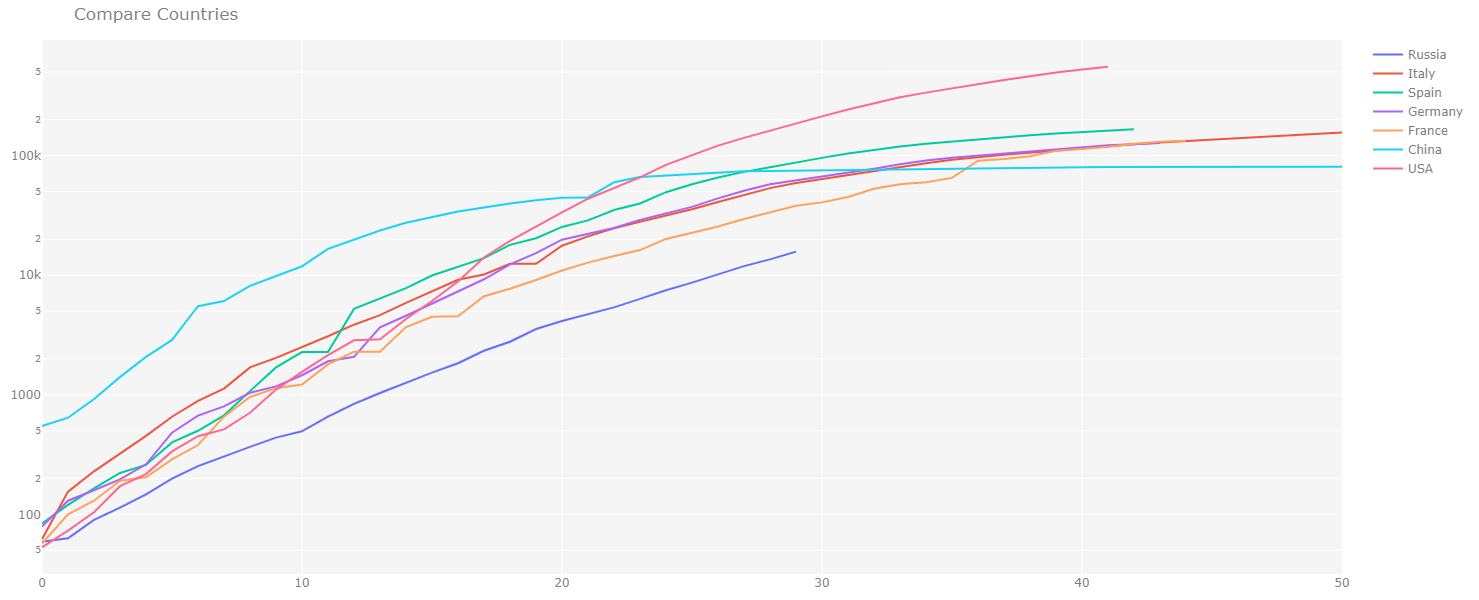

In [80]:
fig = go.Figure()
for key, value in country_df_dic.items():
    fig.add_trace(go.Scatter(x=value.index, y=value['Confirmed'], name=key, mode='lines'))
    
# fig.add_trace(go.Scatter(x=russia_df.index, y=russia_df['Confirmed'], name='Russia', mode='lines')) # fill down to xaxis
# fig.add_trace(go.Scatter(x=italy_df.index, y=italy_df['Confirmed'], name='Italy', mode='lines')) # fill to trace0 y
# fig.add_trace(go.Scatter(x=spain_df.index, y=spain_df['Confirmed'], name='Spain', mode='lines'))
# fig.add_trace(go.Scatter(x=germany_df.index, y=germany_df['Confirmed'], name='Germany', mode='lines'))
# fig.add_trace(go.Scatter(x=france_df.index, y=france_df['Confirmed'], name='France', mode='lines'))
# fig.add_trace(go.Scatter(x=china_df.index, y=china_df['Confirmed'], name='China', mode='lines'))

fig.update_layout(
    yaxis_type='log',
    margin=dict(l=10, r=10, t=40, b=10), width=1100, height=600, plot_bgcolor='rgb(245,245,245)',
    title='Compare Countries',
     font=dict(
        size=12,
        color="#7f7f7f"
    )
)
   
fig.show()

In [22]:
fig = go.Figure()
fig.add_trace(go.Bar(x=full_df.index, y=full_df['Confirmed Daily'], name='Confirmed')) # fill down to xaxis
fig.add_trace(go.Bar(x=full_df.index, y=full_df['Death Daily'], name='Death')) # fill to trace0 y
fig.add_trace(go.Bar(x=full_df.index, y=full_df['Recovery Daily'], name='Recovery')) # fill to trace0 y

fig.update_layout(
    margin=dict(l=10, r=10, t=40, b=10), width=1100, height=600, plot_bgcolor='rgb(245,245,245)',
    title=country + ' : Daily Cases',
     font=dict(
#         family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
    barmode='stack'
)
fig.show()

NameError: name 'full_df' is not defined